# Математический анализ - 1, ФКН ВШЭ

## Лабораторная работа 1: Численное дифференцирование и аппроксимация функции

### Оценивание и штрафы

Максимально допустимая оценка за работу — **10 (+5.5) баллов**.  После мягкого дедлайна оценка каждый день уменьшается на 1 балл до жесткого дедлайна. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Весь код должен быть написан самостоятельно. Чужим кодом для пользоваться запрещается даже с указанием ссылки на источник. В разумных рамках, конечно. Взять пару очевидных строчек кода для реализации какого-то небольшого функционала можно.

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

**Мягкий дедлайн: 03.02.2025 23:59 (по МСК)**

**Жесткий дедлайн: 05.02.2025 23:59 (по МСК)**

**Сдавать сюда: [Классрум](https://classroom.google.com/c/NzExNTY1NTIzMjcy/a/NzI1MDcyMTYzMTky/details)**

### О задании

В данной лабораторной работе вы познакомитесь с методами численного дифференцирования и аппроксимации функций. Эти методы широко применяются в математическом анализе, численных расчетах и моделировании процессов, где точные аналитические решения недоступны или слишком сложны для использования.

В первой части задания вам предстоит реализовать методы численного дифференцирования. Численное дифференцирование позволяет приближенно вычислять производные функции, основываясь на значениях функции в заданных точках. Это особенно важно, если аналитическое выражение функции неизвестно или её производная вычисляется с трудностями.

Во второй части работы вы изучите различные подходы к аппроксимации функций с использованием полиномов и других интерполяционных методов. Эти методы позволяют эффективно представлять функцию в виде более простых математических выражений, приближая её значения в окрестности точки или на заданном интервале.

P.S Пожалуйста, аккуратно оформляйте графики, ориентироваться можно на [это](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem02-charts.ipynb). У графиков обязательно должно быть:

- Название
- Подписанные оси
- Легенда, если необходимо (например, если несколько графиков на одном рисунке)
- Все должно быть четко видно и ничего не сливаться
- За некрасивые графики можем снизить баллы

In [33]:
from typing import Callable, Tuple

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Часть 1: Численное дифференцирование

Пусть у нас есть функция $f(x): \mathbb{R} \longrightarrow \mathbb{R}$. Вспомним определение производной: (будем считать, что все производные существуют)

$$
f'(x) = \lim\limits_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$

В реальных задачах часто возникает необходимость вычисления производных функций в точках, где аналитическое выражение производной либо неизвестно, либо вычисление её является слишком сложным. В таких случаях на помощь приходят методы **численного дифференцирования**.

Основная идея численного дифференцирования заключается в приближённом вычислении производной через конечные разности (finite difference). Наиболее простые схемы основаны на использовании малых значений $h$, для которых можно аппроксимировать производную через определение.

### Односторонняя разностная схема (forward and backward difference)

Разложим $f(x + h)$ в многочлен Тейлора:

$$
\frac{f(x + h) - f(x)}{h} = \frac{f(x) + f'(x)h + O(h^2) - f(x)}{h} = f'(x) + O(h),
$$

то есть при достаточно малых $h$ (оптимально $h \approx 10^{-6}$, при меньших могут возникнуть проблемы из-за погрешности вычислений) мы можем получить достаточно точную аппроксимацию $f'(x)$.


### Центральная разностная схема (central difference)

Так как у нас есть ограничение на малость порядка для $h$, существует несколько классических способов для вычисления производных с большей точностью. Разложим в многочлен Тейлора $f(x - h)$ и $f(x + h)$:

$$
f(x + h) = f(x) + h f'(x) + \frac{1}{2}h^2 f''(x) + O(h^3)
$$

$$
f(x - h) = f(x) - h f'(x) + \frac{1}{2}h^2 f''(x) + O(h^3)
$$

Тогда получим, что

$$
\frac{f(x + h) - f(x - h)}{2h} = \frac{2h f'(x) + O(h^3)}{2h} = f'(x) + O(h^2)
$$

Мы можем еще повысить точность, если будем рассматривать точки $x - 2h, x - h, x + h, x + 2h$ и разложим в многочлен Тейлора:

$$
\frac{f(x + 2h) - f(x - 2h)}{4h} = f'(x) + \frac{2}{3}f^{(3)}(x)h^2 + O(h^4)
$$

Теперь возьмем аппроксимацию $f'(x)$ как линейную комбинацию, чтобы сократить лишнее слагаемое:

$$
f'(x) \approx \alpha \frac{f(x + h) - f(x - h)}{2h} + \beta \frac{f(x + 2h) - f(x - 2h)}{4h} = (\alpha + \beta) f'(x) + \left(\frac{\alpha}{3} + \frac{\beta}{6}\right) f^{(3)}(x) h^2 + O(h^4)
$$

Получаем систему уравнений:

$$
\begin{cases}
    \alpha + \beta = 1\\
    \frac{\alpha}{3} + \frac{\alpha}{6} = 0
\end{cases} \iff \begin{cases}
    \alpha = -1\\
    \beta = 2
\end{cases}
$$

В итоге получаем формулу:

$$
f'(x) \approx 2\frac{f(x + 2h) + f(x - 2h)}{4h} - \frac{f(x + h) - f(x - h)}{2h} + O(h^4)
$$

В общем случае $x + h_1, \ldots, x, \ldots, x + h_n$ все решается аналогично:

$$
f'(x) = \sum\limits_{i = 1}^n \frac{\lambda_i}{h_i} f(x + h_i)
$$

Коэффициенты $\lambda_i$ подбираются по методу неопределенных коэффициентов.

При этом если пытаться достигнуть больших степеней, то система уравнений на коэффициенты может иметь большое число обусловленности (condition number), то есть будет вычислительно неустойчивой, поэтому на практике чаще используют до $O(h^2)$ точности.


### Производные старших порядков

Также можно вычислять производные старших порядков.

$$
f''(x) \approx \frac{f(x + h) + f(x - h) - 2f(x)}{h^2}
$$

Разложим в многочлен Тейлора:

$$
f(x + h) = f(x) + h f'(x) + \frac{1}{2} f''(x) h^2 + \frac{1}{6} f'''(x) h^3 + O(h^4)
$$

$$
f(x - h) = f(x) - h f'(x) + \frac{1}{2} f''(x) h^2 - \frac{1}{6} f'''(x) h^3 + O(h^4)
$$

Тогда, сложив, получим, что

$$
f''(x) = \frac{f(x + h) + f(x - h) - 2f(x)}{h^2} + O(h^2)
$$

**Задание 1 (1 балл):** Выведите аналитически формулу для $k$-ой производной и напишите функции для вычисления производной функции $f(x)$ всеми способами выше, а также для вычисления второй производной $f(x)$. Сравните погрешность с аналитической производной при различных $h$, нарисуйте графики абсолютной ошибки от $h$ в логарифмическом масштабе. Согласуются ли графики с теоретическими оценками погрешности? Для второй производной сравните также с методом по определению через $f'(x)$. Сделайте вывод об оптимальном $h$.

В качестве $f(x)$ здесь и далее возьмем $f(x) = e^x \cdot (\cos x + \sin x)$ на отрезке $[-2, 2]$

**Ответ:**

Выведем аналитически формулу для $k$-ой производной: (Переход делается через формулу суммы для синуса и косинуса)

$f(x) = e^x\cdot(\cos x + \sin x) = \sqrt 2e^x \cdot \cos (x - \frac{\pi}{4})$

$f'(x) = 2e^x\cdot \cos x = 2e^x\cdot \cos(x + \frac{(1 - 1)\pi}{4})$

$f''(x) = 2e^x\cdot(\cos x - \sin x) = 2\sqrt 2e^x \cdot(\cos x + \frac{(2 - 1)\pi}{4})$

$f'''(x) = -4e^x\cdot \sin x = 4e^x \cdot(\cos x + \frac{(3 - 1)\pi}{4})$

$f''''(x) = -4e^x\cdot(\cos x + \sin x) = 4\sqrt 2e^x \cdot(\cos x + \frac{(4 - 1)\pi}{4})$

Заметим, что $-4f(x) = f''''(x)$, произошел "цикл".

Таким образом, получим:
$f^{(k)}(x) = 2^{\frac{k + 1}{2}} \cdot e^x \cdot \cos(x + \frac{(k - 1)\pi}{4})$

In [34]:
def f(x: np.ndarray) -> np.ndarray:
    """
    Compute the value of the function f(x) = e^x * (cos(x) + sin(x)).

    Parameters
    ----------
    x : np.ndarray
        Input array of points where the function is evaluated.

    Returns
    -------
    np.ndarray
        The computed values of f(x) for the input array.

    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """
    return np.exp(x) * (np.cos(x) + np.sin(x))

def df_dx(x: np.ndarray, order: int = 1) -> np.ndarray:
    """
    Compute the k-th derivative of the function f(x) = e^x * (cos(x) + sin(x)).

    Parameters
    ----------
    x : np.ndarray
        Input array of points where the derivative is evaluated.
    order : int, optional
        The order of the derivative to compute (default is 1).

    Returns
    -------
    np.ndarray
        The k-th derivative values of f(x) for the input array.

    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """
    factor = np.power(2, (order + 1) / 2)
    return factor * np.exp(x) * np.cos(x + (order - 1) * np.pi / 4)


def forward_derivative(func: Callable, x: np.ndarray, dx: float = 1.0e-6) -> np.ndarray:
    """
    Compute the first-order forward derivative of a given function using finite differences.

    Parameters
    ----------
    func : Callable
        The function for which the derivative is computed.
    x : np.ndarray
        Input array of points where the derivative is evaluated.
    dx : float, optional
        The step size for finite differences (default is 1.0e-6).

    Returns
    -------
    np.ndarray
        The forward derivative of the function at the input points.

    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """
    return (func(x + dx) - func(x)) / dx


def center_derivative(func: Callable, x: np.ndarray, dx: float = 1.0e-6) -> np.ndarray:
    """
    Compute the first-order centered derivative of a given function using finite differences.

    Parameters
    ----------
    func : Callable
        The function for which the derivative is computed.
    x : np.ndarray
        Input array of points where the derivative is evaluated.
    dx : float, optional
        The step size for finite differences (default is 1.0e-6).

    Returns
    -------
    np.ndarray
        The centered derivative of the function at the input points.

    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """
    return (func(x + dx) - func(x - dx)) / (2 * dx)


def second_derivative(func: Callable, x: np.ndarray, dx: float = 1.0e-6) -> np.ndarray:
    """
    Compute the second-order derivative of a given function using finite differences.

    Parameters
    ----------
    func : Callable
        The function for which the derivative is computed.
    x : np.ndarray
        Input array of points where the derivative is evaluated.
    dx : float, optional
        The step size for finite differences (default is 1.0e-6).

    Returns
    -------
    np.ndarray
        The second-order derivative of the function at the input points.

    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """
    return (func(x + dx) - 2 * func(x) + func(x - dx)) / (dx ** 2)

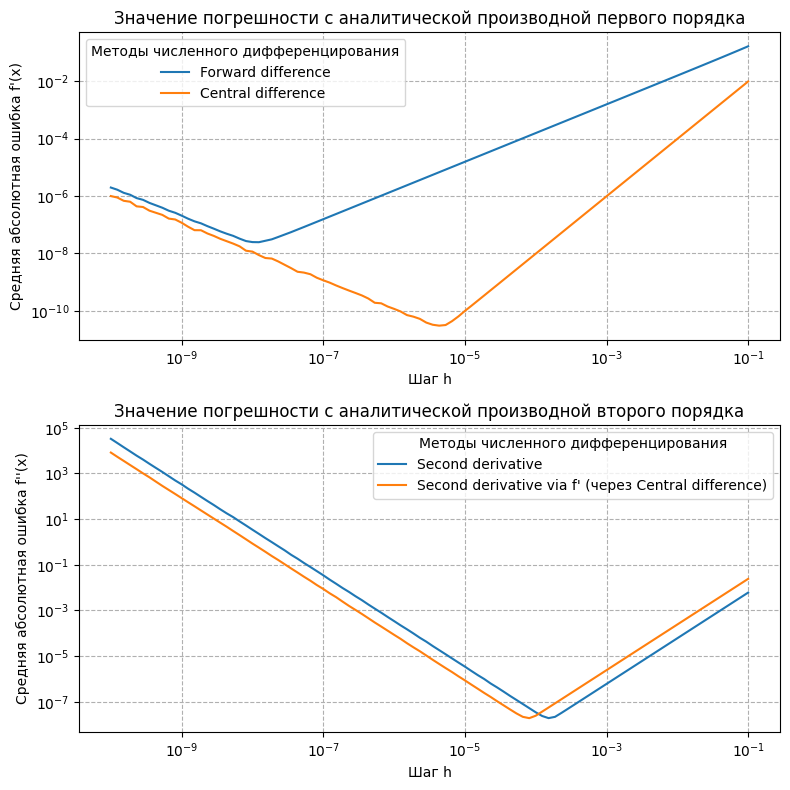

Оптимальные h:
Forward: h = 1.23e-08, ошибка = 2.46e-08
Centeral:  h = 4.33e-06, ошибка = 3.05e-11
Second derivative: h = 1.52e-04, ошибка = 1.91e-08


In [76]:
# Зададим диапазон для x
x = np.linspace(-2, 2, 10000)
# Вычислим аналитически первую производную
dfx_analytical = df_dx(x, order=1)
# Вычислим аналитически вторую производную
d2fx_analytical = df_dx(x, order=2)

# Выберем набор значений h для исследования ошибки
dx_values = np.logspace(-10, -1, 100)

# Массивы для накопления средней абсолютной ошибки по x
err_forward = []
err_center  = []
err_second  = []
err_second_via_first = [] # вторая производная, вычисленная как производная от численного f'


for dx in dx_values:
    dfx_forward = forward_derivative(f, x, dx)
    dfx_center  = center_derivative(f, x, dx)
    d2fx_center = second_derivative(f, x, dx)
    
    # Можно также вычислить f'' как численную производную от center_derivative
    # используя центральную разность для f':
    d2fx_from_first = center_derivative(lambda x: center_derivative(f, x, dx), x, dx)
    
    err_forward.append(np.mean(np.abs(dfx_forward - dfx_analytical)))
    err_center.append(np.mean(np.abs(dfx_center - dfx_analytical)))
    err_second.append(np.mean(np.abs(d2fx_center - d2fx_analytical)))
    err_second_via_first.append(np.mean(np.abs(d2fx_from_first - d2fx_analytical)))

# Построим графики
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.loglog(dx_values, err_forward, label='Forward difference')
plt.loglog(dx_values, err_center, label='Central difference')
plt.xlabel('Шаг h')
plt.ylabel('Средняя абсолютная ошибка f\'(x)')
plt.title('Значение погрешности с аналитической производной первого порядка')
plt.legend(title='Методы численного дифференцирования')
plt.grid(True, which="both", ls="--")

plt.subplot(2, 1, 2)
plt.loglog(dx_values, err_second, label='Second derivative')
plt.loglog(dx_values, err_second_via_first, label='Second derivative via f\' (через Central difference)')
plt.xlabel('Шаг h')
plt.ylabel('Средняя абсолютная ошибка f\'\'(x)')
plt.title('Значение погрешности с аналитической производной второго порядка')
plt.legend(title='Методы численного дифференцирования')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

# Выводим оптимальные значения шага h
idx_opt_forward = np.argmin(err_forward)
idx_opt_center  = np.argmin(err_center)
idx_opt_second  = np.argmin(err_second)
print("Оптимальные h:")
print("Forward: h = {:.2e}, ошибка = {:.2e}".format(dx_values[idx_opt_forward], err_forward[idx_opt_forward]))
print("Centeral:  h = {:.2e}, ошибка = {:.2e}".format(dx_values[idx_opt_center], err_center[idx_opt_center]))
print("Second derivative: h = {:.2e}, ошибка = {:.2e}".format(dx_values[idx_opt_second], err_second[idx_opt_second]))

Графики совпают с теоритической оценкой погрешности до определенного момента(для каждого метода этот момент разный), это происходит из-за погрешности вычислений(чем сложнее с точки зрения вычисления метод, тем меньше будет точность, очень наглядно видно в случае графика второй произвоной).

**Бонусное задание 1 (1 балл):** Докажите формулу для $n$-ой производной

$$
f^{(n)}(x) = \lim\limits_{h \to 0} \frac{1}{h^n} \sum\limits_{k = 0}^n (-1)^{k + n} \binom{n}{k} f(x + kh)
$$

**Ответ:**

## Часть 2: Аппроксимация функции

На практике часто необходимо приблизить сложную функцию в более простом виде, но без существенной потери точности.

### Многочлен Тейлора

Начнем с самого простого, но не самого эффективного способа.

Пусть функция $f(x)$ бесконечно раз дифференцируема. Как мы знаем, тогда мы можем в окрестности точки $x_0$ построить ряд Тейлора, чтобы ее аппроксимировать:

$$
f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \ldots + \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n + \ldots
$$

Мы будем аппроксимировать ее конечным числом слагаемых:

$$
f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \ldots + \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n + O(|x - x_0|^{n+1})
$$

**Задание 2 (1 балл):** Реализуйте аппроксимацию функции $f(x)$ с помощью многочлена Тейлора $p(x)$ при различных $n$. Постройте графики $f(x)$ и $p(x)$ и график абсолютной ошибки при различных $n$ в логарифмическом масштабе. Согласуются ли графики с теоретическими оценками погрешности?

**Ответ:**

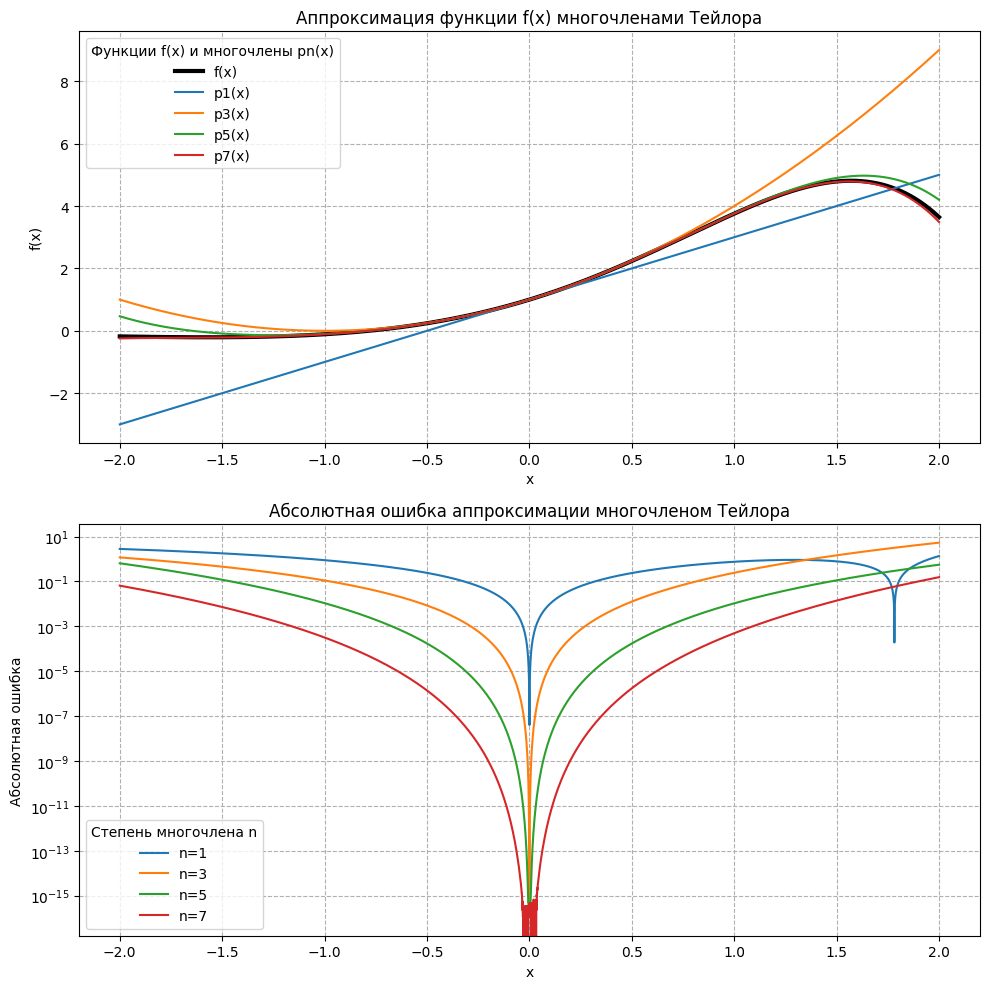

In [75]:
from math import factorial

def taylor_polynomial(x: np.ndarray, n: int, x0: float = 0.0) -> np.ndarray:
    """
    Computes the Taylor polynomial of order n for the function f(x) at point x0.
    
    p_n(x) = sum_{k=0}^{n} f^(k)(x0)/k! * (x - x0)^k.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points where the polynomial is evaluated.
    n : int
        Order of the Taylor polynomial.
    x0 : float, optional
        Expansion center (default is 0.0).
    
    Returns
    -------
    np.ndarray
        Values of the Taylor polynomial at points x.
    """
    p = np.zeros_like(x, dtype=float)
    for k in range(n + 1):
        term = df_dx(x0, k) / factorial(k) * (x - x0) ** k
        p += term
    return p

# Диапазон x для построения графиков
x = np.linspace(-2, 2, 10000)
fx = f(x)

# Выберем набор степеней многочлена для сравнения
orders = list(range(1, 8, 2))

plt.figure(figsize=(10, 10))
    
# Графики аппроксимации
plt.subplot(2, 1, 1)
plt.plot(x, fx, 'k', linewidth=4, label='f(x)')
for n in orders:
    p_n = taylor_polynomial(x, n, x0=0)
    plt.plot(x, p_n, label=f'p{n}(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Аппроксимация функции f(x) многочленами Тейлора')
plt.legend(title="Функции f(x) и многочлены pn(x)")
plt.grid(True, which="both", ls="--")
    
# График абсолютной ошибки в логарифмическом масштабе
plt.subplot(2, 1, 2)
n = 1
for n in orders:
    p_n = taylor_polynomial(x, n, x0=0)
    error = np.abs(fx - p_n)
    plt.plot(x, error, label=f'n={n}')

plt.yscale('log')
plt.legend(title='Степень многочлена n')
plt.xlabel('x')
plt.ylabel('Абсолютная ошибка')
plt.title('Абсолютная ошибка аппроксимации многочленом Тейлора')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

Значение абсолютной ошибки действительно $O(|x - x_0|^{n+1})$

### Классическая интерполяция

Понятно, что многочлен Тейлора не самый эффективный способ приблизить функцию, так как требует большого количества слагаемых (соответственно, много вычислений производных), чтобы хорошо аппроксимировать ее, особенно если нужно приблизить не в окрестности конкретной точки, а на интервале.

Вместо этого можно использовать другой подход — интерполяцию.

In [52]:
def generate_interpolation_nodes_uniform(
    segment: Tuple[float, float],
    count_nodes: int,
) -> np.ndarray:
    return np.linspace(segment[0], segment[1], count_nodes)

def generate_interpolation_nodes_random(
    segment: Tuple[float, float],
    count_nodes: int,
) -> np.ndarray:
    return np.sort(np.random.uniform(segment[0], segment[1], count_nodes))

def generate_test_points(
    target_func: Callable,
    segment: Tuple[float, float],
    count_nodes: int = 1000,
) -> Tuple[np.ndarray, np.ndarray]:
    x = np.linspace(segment[0], segment[1], count_nodes + 1)
    y = target_func(x)
    return x, y

#### Многочлен Лагранжа

Начнем с самого простого способа — многочлена Лагранжа.

Интерполяционный многочлен Лагранжа для данной функции $f(x)$ может быть построен в форме Лагранжа:
$$
p(x) = \sum_{i=1}^{n} y_i \cdot l_i(x), y_i = f(x_i)
$$
Здесь $l_i(x)$ - базисные многочлены Лагранжа:
$$
l_i(x) = \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)}
$$

**Задание 3 (2 балла):** Реализуйте класс `LagrangePoly`:

In [66]:
class LagrangePoly:
    """
    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """

    def __init__(self, nodes: np.ndarray, values: np.ndarray):
        """
        Initialize the Lagrange Polynomial interpolator.

        Parameters
        ----------
        nodes : np.ndarray
            The x-coordinates of the interpolation nodes.
        values : np.ndarray
            The y-coordinates (function values) corresponding to the nodes.
        """
        self.nodes = nodes
        self.values = values

    def compute_lagrange_basis(self, x: np.ndarray) -> np.ndarray:
        """
        Compute the Lagrange basis polynomials evaluated at x.

        Parameters
        ----------
        x : np.ndarray
            The points at which to evaluate the Lagrange basis polynomials.

        Returns
        -------
        np.ndarray
            A 2D array of shape (len(x), len(nodes)) where each column represents
            a Lagrange basis polynomial evaluated at x.
        """
        n = len(self.nodes)
        basis = np.ones((len(x), n))

        for i in range(n):
            numerator = np.prod([(x - self.nodes[j]) / (self.nodes[i] - self.nodes[j])
                                 for j in range(n) if j != i], axis=0)
            basis[:, i] = numerator

        return basis

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the interpolated values at x using the Lagrange Polynomial.

        Parameters
        ----------
        x : np.ndarray
            The points at which to interpolate the function.

        Returns
        -------
        np.ndarray
            The interpolated values at x.
        """
        basis = self.compute_lagrange_basis(x)
        return np.dot(basis, self.values)

#### Многочлен Ньютона

Как известно, у многочлена Лагранжа есть несколько недостатков:
- требуется постоянно пересчитывать базисные многочлены
- если добавится еще один узел, то нужно заново все пересчитывать

Поэтому перейдем к более эффективному методу — к многочлену Ньютона.

Интерполяционный многочлен в форме Ньютона выглядит следующим обраозм:
$$
p(x) = f[x_0] + f[x_0, x_1] (x - x_0) + ... + f[x_0, ... , x_n] (x - x_0) ... (x - x_{n-1})
$$

$f[x_i, ... , x_j]$ - разделенные разности, которые могут быть вычислены рекурсивно:
$$
f[x_i] = y_i
$$
$y_i$ - значение функции в узлах интерполяции
$$
f[x_i, ..., x_j] = \frac{f[x_{i + 1}, ..., x_j] - f[x_i, ..., x_{j - 1}]}{x_j - x_i}
$$

**Задание 4 (2 балла):** Реализуйте класс `NewtonPoly`:

In [72]:
class NewtonPoly:
    """
    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """

    def __init__(self, nodes: np.ndarray, values: np.ndarray):
        """
        Initialize the Newton Polynomial interpolator.

        Parameters
        ----------
        nodes : np.ndarray
            The x-coordinates of the interpolation nodes.
        values : np.ndarray
            The y-coordinates (function values) corresponding to the nodes.
        """
        self.nodes = nodes
        self.values = values
        self.coeffs = self._divided_differences()

    def _divided_differences(self) -> np.ndarray:
        """
        Compute the coefficients of the Newton interpolating polynomial
        using divided differences.

        Returns
        -------
        np.ndarray
            An array containing the coefficients of the Newton polynomial.
        """
        n = len(self.nodes)
        coef = np.array(self.values, dtype=float)

        # Воспользуемся инвариантом, что на j-м шаге в coef[i]
        # хранится значение f[xi-j, ...,xi-1 , xi] - разделенная разность
        # Тогда пересчет очев
        for j in range(1, n):
            coef[j:] = (coef[j:] - coef[j - 1]) / (self.nodes[j:] - self.nodes[j - 1])

        return coef

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the interpolated values at x using the Newton Polynomial.

        Parameters
        ----------
        x : np.ndarray
            The points at which to interpolate the function.

        Returns
        -------
        np.ndarray
            The interpolated values at x.
        """
        n = len(self.coeffs)
        result = self.coeffs[-1]

        # пересчет справа налево, дальше очев
        for i in range(n - 2, -1, -1):
            result = result * (x - self.nodes[i]) + self.coeffs[i]

        return result

In [77]:
def f1(x):
    return x**2


def f2(x):
    return np.sin(x)


def test_interpolation(func, interpolator_cls):
    nodes = np.linspace(-1, 1, 20)
    values = func(nodes)

    interpolator = interpolator_cls(nodes, values)

    x_test = np.random.uniform(-1, 1, 10)
    predicted_values = interpolator.predict(x_test)

    target_values = func(x_test)

    assert np.allclose(
        predicted_values, target_values
    ), f"{interpolator_cls.__name__} interpolation failed!"


test_interpolation(f1, LagrangePoly)
test_interpolation(f2, LagrangePoly)

test_interpolation(f1, NewtonPoly)
test_interpolation(f2, NewtonPoly)

**Задание 5 (1 балла):**

- Постройте график $f(x)$ и $p(x)$ на отрезке $[a, b]$ (для Лагранжа и Ньютона отдельно)
- Посчитайте ошибку аппроксимации $r$ на тестовых точках $\xi_1, \ldots, \xi_N$:

    $$
    r = \sqrt{\frac{1}{N} \sum\limits_{i = 1}^N \Big(f(\xi_i) - p(\xi_i)\Big)^2}
    $$

Проделайте пункты выше для всех $n \in \{3, 5, 10, 15, 20, 25\}$ и постройте график зависимости $r(n)$ (в логарифмической шкале). Сравните $r(n)$ при равномерной генерации узлов и рандомной

**Вопрос:** Как ведут себя графики ошибки с ростом $n$? Какой многочлен лучше оказался?

**Ответ:**

In [81]:
def compute_inaccuracy(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


def benchmark(
    segment: Tuple[float, float],
    node_generator: Callable,
    target_func: Callable,
    interpolator_cls,

    # WARNING!!!
    # добавил параметр n
    n: int
):
    nodes = node_generator(segment, n)
    values = target_func(nodes)

    x_test, y_test = generate_test_points(target_func, segment)

    interpolator = interpolator_cls(nodes=nodes, values=values)
    y_pred = interpolator.predict(x=x_test)
    inaccuracy = round(compute_inaccuracy(y_true=y_test, y_pred=y_pred), 6)

    # WARNING!!!

    # Было 
    # return inaccuracy

    # Стало
    return inaccuracy, x_test, y_test, y_pred
    # Сделано для удобства дальнейшей работы

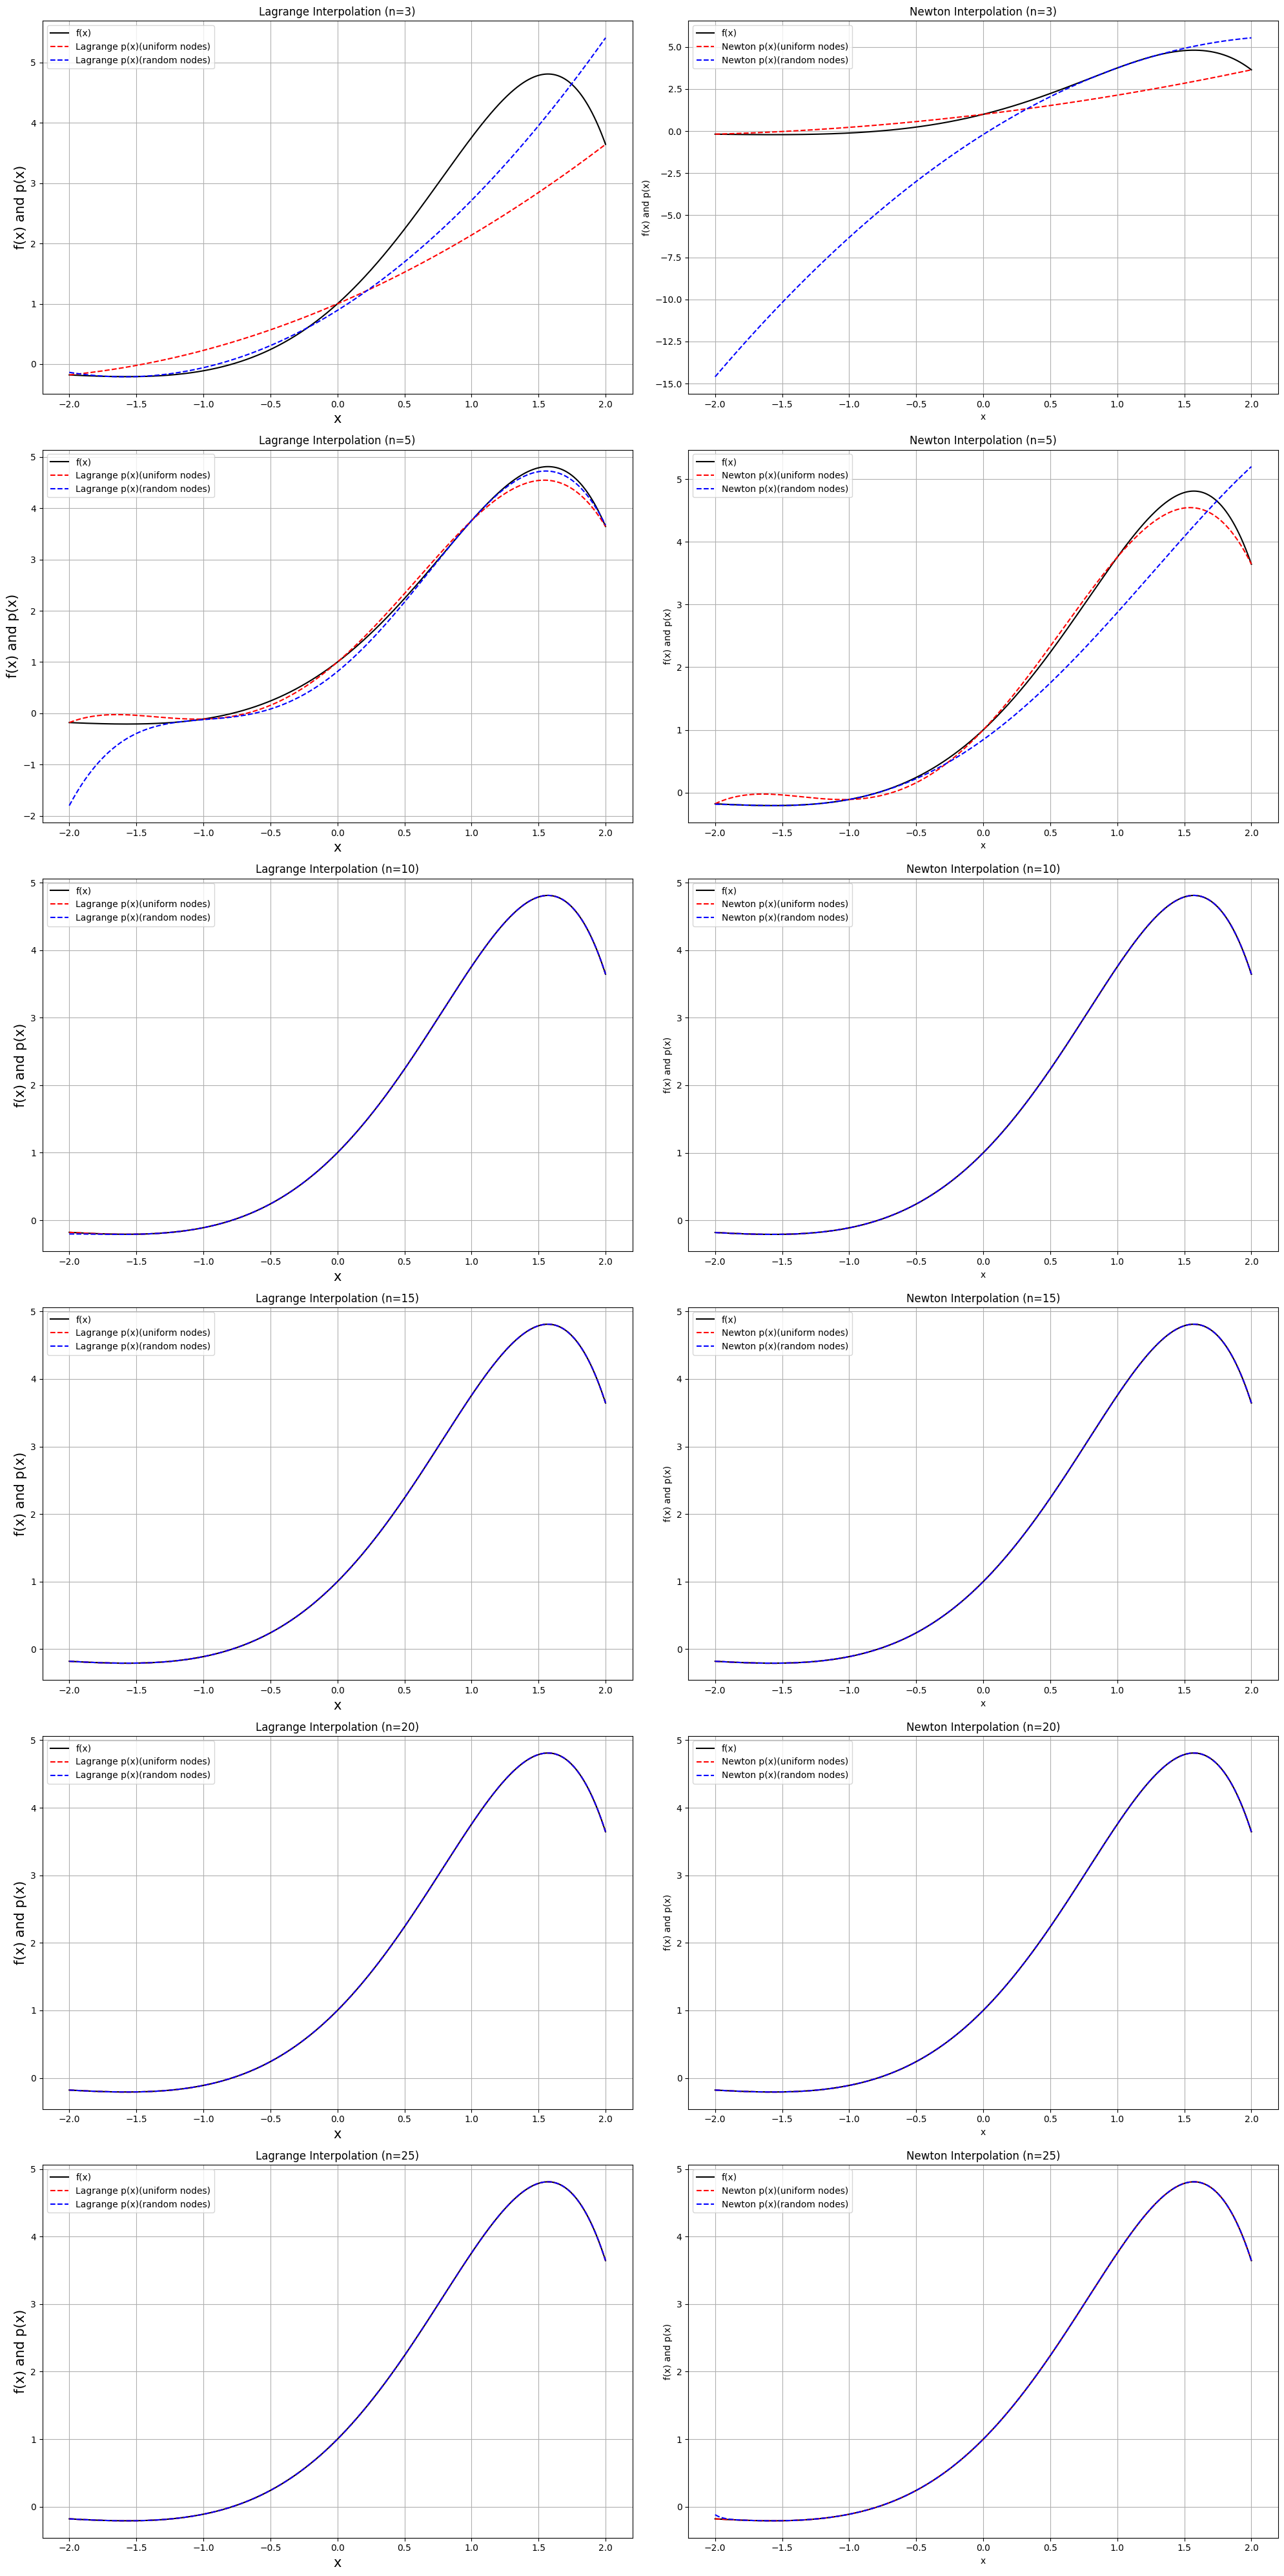

In [88]:
segment = (-2, 2)
n_values = [3, 5, 10, 15, 20, 25]

# Списки для накопления ошибок
errors_lagrange_uniform = []
errors_lagrange_random = []
errors_newton_uniform = []
errors_newton_random = []

plt.figure(figsize=(20, 30))

# Вычисление ошибок для разных n
i = 1
for n in n_values:
    # Выполним для Lagrange, Newton и для равномерных и случайных узлов
    err_lag_unif, x, y, y_pred_lag_uniform = benchmark(segment, generate_interpolation_nodes_uniform, f, LagrangePoly, n)
    err_lag_rand, x, y, y_pred_lag_rand = benchmark(segment, generate_interpolation_nodes_random, f, LagrangePoly, n)
    err_newt_unif, x, y, y_pred_newt_uniform = benchmark(segment, generate_interpolation_nodes_uniform, f, NewtonPoly, n)
    err_newt_rand, x , y, y_pred_newt_rand = benchmark(segment, generate_interpolation_nodes_random, f, NewtonPoly, n)

    errors_lagrange_uniform.append(err_lag_unif)
    errors_lagrange_random.append(err_lag_rand)
    errors_newton_uniform.append(err_newt_unif)
    errors_newton_random.append(err_newt_rand)

    # Построение графиков интерполяции для текущего n
    # Лагранж
    plt.subplot(2, 2, 1)

    plt.plot(x, y, 'k', label="f(x)")
    plt.plot(x, y_pred_lag_uniform, 'r--', label="Lagrange p(x)(uniform nodes)")
    plt.plot(x, y_pred_lag_rand, 'b--', label="Lagrange p(x)(random nodes)")
    # plt.scatter(nodes_lag, values_lag, c='blue', zorder=5, label="Nodes")
    plt.xlabel("x", fontsize=15)
    plt.ylabel("f(x) and p(x)", fontsize=15)
    plt.title(f"Lagrange Interpolation (n={n}), uniform")
    plt.legend()
    plt.grid(True)

    # Ньютон
    plt.subplot(6, 2, i + 1)

    plt.plot(x, y, 'k', label="f(x)")
    plt.plot(x, y_pred_newt_uniform, 'r--', label="Newton p(x)(uniform nodes)")
    plt.plot(x, y_pred_newt_rand, 'b--', label="Newton p(x)(random nodes)")
    # plt.scatter(nodes_lag, values_lag, c='blue', zorder=5, label="Nodes")
    plt.xlabel("x")
    plt.ylabel("f(x) and p(x)")
    plt.title(f"Newton Interpolation (n={n})")
    plt.legend()
    plt.grid(True)

    i += 2

plt.tight_layout()
plt.show()

# --- Построение графика зависимости ошибки r(n) ---
# plt.figure(figsize=(10, 6))
# plt.plot(n_values, errors_lagrange_uniform, 'o-', label="Lagrange (uniform)")
# plt.plot(n_values, errors_lagrange_random,  's-', label="Lagrange (random)")
# plt.plot(n_values, errors_newton_uniform,   'd-', label="Newton (uniform)")
# plt.plot(n_values, errors_newton_random,    'x-', label="Newton (random)")
# plt.yscale("log")
# plt.xlabel("Number of nodes n")
# plt.ylabel("Approximation error r (log scale)")
# plt.title("Error r(n) for Interpolation Methods")
# plt.legend()
# plt.grid(True, which="both", ls="--")
# plt.show()


### Эрмитова интерполяция

Часто на практике нам необходимо, чтобы интерполяционный многочлен не только хорошо аппроксимировал значения функции, но и учитывал ее гладкость — так называемая [эрмитова интерполяция](https://ru.wikipedia.org/wiki/%D0%AD%D1%80%D0%BC%D0%B8%D1%82%D0%BE%D0%B2%D0%B0_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F)



#### Многочлен Лагранжа

Вернемся к многочлену Лагранжа и адаптируем его для эрмитовой интерполяции следующим образом: введем многочлены $A_i(x)$ и $B_i(x)$:

$$
A_i(x_j) =
\begin{cases}
    1, i = j\\
    0, i \neq j
\end{cases}
\,
A'_i(x_j) = 0
$$

$$
B'_i(x_j) =
\begin{cases}
    1, i = j\\
    0, i \neq j
\end{cases}
\,
B_i(x_j) = 0
$$

В таком случае интерполяционный многочлен строится следующим образом:

$$
p(x) = \sum\limits_{i = 1}^n y_i A_i(x) + \sum\limits_{i = 1}^n y'_i B_i(x)
$$

Многочлены $A_i(x)$ и $B_i(x)$ определим следующим образом:

$$
\begin{cases}
A_i(x) = (1 - 2(x - x_i) \cdot l'_i(x)) \cdot l_i^2(x)\\
B_i(x) = (x - x_i) \cdot l_i^2(x)
\end{cases}
$$

Здесь $l_i(x)$ - базисные многочлены Лагранжа

**Задание 6 (1 балл):** Проверьте, что многочлены $A$ и $B$ удовлетворяют условиями . Реализуйте класс `LagrangeDerivativePoly`:

**Ответ:**

In [ ]:
class LagrangeDerivativePoly:
    """
    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """

    def __init__(self, nodes: np.ndarray, values: np.ndarray, der_values: np.ndarray):
        """
        Initialize the Lagrange Polynomial with derivative values.

        Parameters
        ----------
        nodes : np.ndarray
            The x-coordinates of the interpolation nodes.
        values : np.ndarray
            The y-coordinates (function values) corresponding to the nodes.
        der_values : np.ndarray
            The first derivatives of the function at the nodes.
        """
        self.nodes = nodes
        self.values = values
        self.der_values = der_values

    def compute_lagrange_basis(self, x: np.ndarray) -> np.ndarray:
        """
        Compute the Lagrange basis polynomials evaluated at x.

        Parameters
        ----------
        x : np.ndarray
            The points at which to evaluate the Lagrange basis polynomials.

        Returns
        -------
        np.ndarray
            A 2D array of shape (len(x), len(nodes)) where each column represents
            a Lagrange basis polynomial evaluated at x.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        raise NotImplementedError

    def compute_A_B_polynomials(self, x: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Compute the A(x) and B(x) polynomials for the Hermite interpolation.

        Parameters
        ----------
        x : np.ndarray
            The points at which to compute A(x) and B(x).

        Returns
        -------
        Tuple[np.ndarray, np.ndarray]
            - A(x): 2D array of the Lagrange polynomials weighted by derivatives.
            - B(x): 2D array of the standard Lagrange polynomials.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        raise NotImplementedError

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the interpolated values at x using the Lagrange Polynomial.

        Parameters
        ----------
        x : np.ndarray
            The points at which to interpolate the function.

        Returns
        -------
        np.ndarray
            The interpolated values at x.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        raise NotImplementedError

#### Многочлен Ньютона

К сожалению, многочлен Лагранжа сложно адаптируется под случаи, когда заданы производные старших степеней, поэтому чаще используют многочлены Ньютона с разделенныи разностями с повторениями.

Интерполяционный многочлен в форме Ньютона выглядит следующим образом:
$$
p(x) = f[x_0] + f[x_0, x_1] (x - x_0) + ... + f[x_0, ... , x_n] (x - x_0) ... (x - x_{n-1})
$$
$f[x_i, ... , x_j]$ - разделенные разности, которые могут быть вычислены рекурсивно:
$$
f[x_i] = y_i
$$
$y_i$ - значение функции в узлах интерполяции
Если $x_i \neq x_j$:
$$
f[x_i, ..., x_j] = \frac{f[x_{i + 1}, ..., x_j] - f[x_i, ..., x_{j - 1}]}{x_j - x_i}
$$
В противном случае:
$$
f[x_i, ..., x_j] = \frac{\partial^{j - i} f(x_i)}{\partial x ^{j - i}}
$$

Для алгоритма СУЩЕСТВЕНЕН порядок узлов интерполяции - входные данные (узлы интерполяции) следует упорядочить (по возрастанию)

**Задание 6 (1 балл):** Реализуйте класс `NewtonDerivativePoly`:

In [ ]:
def generate_interpolation_nodes_with_rep(
    segment: Tuple[float, float], num_nodes: int, max_der_order: int
):
    return np.sort(
        np.repeat(np.linspace(segment[0], segment[1], num_nodes), repeats=max_der_order + 1)
    )


class NewtonDerivativePoly:
    """
    Notes
    -----
    This implementation does not use loops over `x`. Instead, it utilizes fully vectorized operations.
    """

    def __init__(self, nodes: np.ndarray, values: np.ndarray):
        """
        Initialize the Newton Polynomial interpolator.

        Parameters
        ----------
        nodes : np.ndarray
            The x-coordinates of the interpolation nodes.
        values : np.ndarray
            The y-coordinates (function values) corresponding to the nodes.
        """
        self.nodes = nodes
        self.values = values
        self.coeffs = self._divided_differences()

    def _divided_differences(self) -> np.ndarray:
        """
        Compute the coefficients of the Newton interpolating polynomial
        using divided differences.

        Returns
        -------
        np.ndarray
            An array containing the coefficients of the Newton polynomial.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        raise NotImplementedError

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the interpolated values at x using the Newton Polynomial.

        Parameters
        ----------
        x : np.ndarray
            The points at which to interpolate the function.

        Returns
        -------
        np.ndarray
            The interpolated values at x.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        raise NotImplementedError

**Задание 7 (1 баллов):** Аналогично прошлому заданию постройте графики с многочленами Лагранжа и Ньютона для эрмитовой интерполяции. Есть ли разница в точности с классическими методами? Докажите графиками. Проверьте условия равенства производных.

**Ответ:**

In [ ]:
# Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*

### Бонус: Интерполяция кубическим сплайном

Кубические сплайны — это кусочные многочлены третьей степени, которые используются для интерполяции данных и создания гладких кривых. Они обеспечивают непрерывность и гладкость между узлами, что делает их популярным выбором в численных методах, компьютерной графике и приложениях, связанных с обработкой данных

### Основные характеристики кубических сплайнов:

1. **Форма полинома**:
   Кубический полином на интервале $[x_i, x_{i+1}]$ имеет вид:
   $$
   S_i(x) = a_i + b_i (x - x_i) + c_i (x - x_i)^2 + d_i (x - x_i)^3
   $$
   где $a_i, b_i, c_i, d_i$ — коэффициенты, которые нужно определить

2. **Условия непрерывности**:
   Чтобы сплайн был гладким, необходимо удовлетворять определённым условиям:
   - **Непрерывность**: Значения сплайнов в узловых точках должны совпадать:
     $$
     S_i(x_{i+1}) = S_{i+1}(x_{i+1})
     $$
   - **Непрерывность первой производной**: Первая производная сплайнов должна быть непрерывной:
     $$
     S_i'(x_{i+1}) = S_{i+1}'(x_{i+1})
     $$
   - **Непрерывность второй производной**: Вторая производная также должна быть непрерывной:
     $$
     S_i''(x_{i+1}) = S_{i+1}''(x_{i+1})
     $$

3. **Граничные условия**:
   Граничные условия определяют поведение сплайна на границах интервала. Существуют разные типы граничных условий:
   - **Неподвижные границы (natural spline)**: Вторая производная на границах равна нулю:
     $$
     S_0''(x_0) = 0 \quad \text{и} \quad S_{n-1}''(x_n) = 0
     $$
   - **Заданные производные**: Значения первой производной в крайних точках фиксируются

4. **Система уравнений**:
   Чтобы найти коэффициенты кубических сплайнов, необходимо решить систему линейных уравнений, которая формируется на основе условий непрерывности и производных. Это приводит к созданию матрицы, которую можно решить с помощью методов (численной) линейной алгебры

- **Преимущества**:
  - Высокая гладкость и непрерывность
  - Гибкость в подгонке под данные
  - Возможность работать с ограниченными наборами данных

- **Недостатки**:
  - Может быть сложным для реализации, особенно при большом количестве узлов
  - Появление осцилляций между узлами (особенно при использовании более высоких порядков)

  **Бонусное задание 2 (3 балла):** Реализуйте класс `CubicSplice`. Чтобы лучше узнать про реализацию, посмотрите [тут](https://drive.google.com/file/d/1zQ_O-dqgZQoR4GmtAMvDLxkXEk4r2TU5/view?usp=share_link) в соответствующем разделе.

In [ ]:
class CubicSplice:
    """
    Notes
    -----
    This implementation does not use loops. Instead, it utilizes fully vectorized operations.
    """

    def __init__(
        self,
        nodes: np.ndarray,
        values: np.ndarray,
        left_first_der: float,
        right_first_der: float,
    ):
        """
        Initialize the cubic spline interpolator with boundary conditions.

        Parameters
        ----------
        nodes : np.ndarray
            The x-coordinates of the interpolation nodes.
        values : np.ndarray
            The y-coordinates corresponding to the nodes.
        left_first_der : float
            The first derivative at the left boundary.
        right_first_der : float
            The first derivative at the right boundary.
        """
        self.nodes = nodes
        self.values = values
        self.left_first_derivative = left_first_der
        self.right_first_derivative = right_first_der

    def locate_argument(self, x: np.ndarray) -> np.ndarray:
        """
        Locate the index of the interval to which each x belongs.

        Parameters
        ----------
        x : np.ndarray
            Array of x values to locate in the spline intervals.

        Returns
        -------
        np.ndarray
            Array of interval indices for each x.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

    @staticmethod
    def compute_linear_function(
        x: np.ndarray, x0: float, y0: float, first_derivative: float
    ) -> np.ndarray:
        """
        Compute the value of the linear function given by a point and slope.

        Parameters
        ----------
        x : np.ndarray
            Array of x values to evaluate.
        x0 : float
            x-coordinate of the point.
        y0 : float
            y-coordinate of the point.
        first_derivative : float
            First derivative at the point.

        Returns
        -------
        np.ndarray
            Array of linear function values at x.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

    @staticmethod
    def compute_cubic_spline_value(
        x_prev: float,
        x_curr: float,
        second_derivative_prev: float,
        second_derivative_curr: float,
        y_prev: float,
        y_curr: float,
        x: float,
    ) -> float:
        """
        Compute the value of the cubic spline in an interval.

        Parameters
        ----------
        x_prev : float
            Left node of the interval.
        x_curr : float
            Right node of the interval.
        second_derivative_prev : float
            Second derivative at the left node.
        second_derivative_curr : float
            Second derivative at the right node.
        y_prev : float
            Value of the function at the left node.
        y_curr : float
            Value of the function at the right node.
        x : float
            Point at which to evaluate the spline.

        Returns
        -------
        float
            The value of the cubic spline at x.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

    def compute_system_matrix(self) -> np.ndarray:
        """
        Compute the system matrix for the cubic spline.

        Returns
        -------
        np.ndarray
            The tridiagonal matrix for the cubic spline system.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

    def compute_right_part(self) -> np.ndarray:
        """
        Compute the right-hand side vector for the cubic spline system.

        Returns
        -------
        np.ndarray
            The right-hand side vector for the system.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

    def compute_second_deriv_vector(self) -> np.ndarray:
        """
        Solve for the second derivatives of the cubic spline.

        Returns
        -------
        np.ndarray
            The second derivatives at each node.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the interpolated values at x using the cubic spline.

        Parameters
        ----------
        x : np.ndarray
            Array of x values to interpolate.

        Returns
        -------
        np.ndarray
            Interpolated values at x.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

**Вопрос:** Проверьте вашу реализацию на какой-нибудь вашей любимой функции, как в прошлом задании с графиками. Сравните точность с классическими многочленам Лагранжа и Ньютона, с многочленом Ньютона для эрмитовой интерполяции. Проверьте условия непрерывности.

**Ответ:**

In [ ]:
# Your code here (つ◕౪◕)つ━☆

### Бонус: Интерполяция радиальными базисными функциями

До этого мы рассматривали аппроксимацию функции одной переменной, но функцию могут быть и нескольких переменных и наши методы будут работать плохо. В конце семестра мы изучим функции многих переменных более детально, но пока посмотрим метод, как можно аппроксимировать такие функции, но в одномерном случае.

Радиальная базисная функция — вещественная функция $\varphi$, которая зависит от расстояния точки $x$ до центра $c$. Мы возьмем самый базовый вариант базисной функции — Гауссовская.

$$
\varphi(x) = e^{-ɛ^2r^2}, r = |x - c|
$$

Тогда для нашей функции $f(x)$ аппроксимация базисными функциями будет иметь вид:

$$
f(x) = \sum\limits_{i = 1}^N w_i \cdot \varphi_i(x),
$$

где $\varphi_i(x) = e^{-ɛ^2(x - x_i)^2}$, $x_i$ — центр, $N$ — количество базисных функций, $w_i$ — коэффициенты.

 **Бонусное задание 3 (1 балл):** Реализуйте класс `RBF`. Подберите гипепараметер $\varepsilon$. Сравните со всеми предыдущими методами. Какой из них оказался лучше всего? Подтвердите свою точку зрения графиками.

In [ ]:
class RBF:
    """
    Notes
    -----
    This implementation does not use loops. Instead, it utilizes fully vectorized operations.
    """

    def __init__(self, centers: np.ndarray, epsilon: float = 1.0):
        """
        Initialize the RBF interpolator.

        Parameters
        ----------
        centers : np.ndarray
            The centers of the radial basis functions.
        epsilon : float, optional
            The shape parameter for the radial basis function, by default 1.0.
        """
        self.centers = np.array(centers)
        self.epsilon = epsilon
        self.weights = None

    def _rbf(self, x: np.ndarray, c: np.ndarray) -> np.ndarray:
        """
        Compute the value of the radial basis function.

        Parameters
        ----------
        x : np.ndarray
            The points at which to evaluate the RBF.
        c : np.ndarray
            The center of the RBF.

        Returns
        -------
        np.ndarray
            The values of the RBF evaluated at x.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

    def fit(self, f_values: np.ndarray):
        """
        Fit the RBF model to the given function values.

        Parameters
        ----------
        f_values : np.ndarray
            The values of the function at the centers.

        Notes
        -----
        This method solves the linear system:
            Φ * weights = f_values,
        where Φ is the matrix of RBF values between centers.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the values at the given points using the RBF model.

        Parameters
        ----------
        x : np.ndarray
            The points at which to predict the function values.

        Returns
        -------
        np.ndarray
            The predicted values at x.
        """
        # Your code here (つ◕౪◕)つ━☆
        raise NotImplementedError

In [ ]:
# Your code here (つ◕౪◕)つ━☆

Как вы все знаете, у нас тут эпоха нейронных сетей. Самым базовым типом нейронной сети — Fully Connected.
Но год назад вышла другая архитектура, которая имеет под собой красивую математику!
Прошу любить и жаловать — [Kolmogorov Arnold Network](https://arxiv.org/abs/2404.19756)!

Оригинально архитектура использовала кубические сплайны, но есть еще и варианты с радиальными функциями, что ускоряет производительность в разы. Теперь вы поняли, для чего тут бонус.)

## Пост-новогодний бонус:

Мы только вышли с каникул и уже началась учеба. Чтобы зафиксировать прекрасное время, пришлите самое забавное ваше фото на этих каникулах!

Если проверяющему понравится, то поставим бонус!

**Бонусное задание 4 (0.5 баллов):**